# Hotel Data Analysis Report

A report to understand relationship between average daily rate for hotels and the lead time before booking. 
    
To-do:
    
    1. Compile a collection of excel sheets into a single dataset and filter out cancellations.
    2. Create a simple linear regression  between these two variables.

In [1]:
#bringing in our libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#bringing in our data
df1 = pd.read_excel(r"C:\Users\PEN BUSINESS ANALYST/Documents\Python for Power BI Users/Python For PowerBI Users Resources Pack/hotel_revenue_historical_full.xlsx", sheet_name = "2018")
df2 = pd.read_excel(r"C:\Users\PEN BUSINESS ANALYST/Documents\Python for Power BI Users/Python For PowerBI Users Resources Pack/hotel_revenue_historical_full.xlsx", sheet_name = "2019")
df3 = pd.read_excel(r"C:\Users\PEN BUSINESS ANALYST/Documents\Python for Power BI Users/Python For PowerBI Users Resources Pack/hotel_revenue_historical_full.xlsx", sheet_name = "2020")
full_dataset = pd.concat([df1,df2,df3])
full_dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01
40683,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16
40684,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06
40685,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17


In [3]:
full_dataset.tail(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40637,City Hotel,1,272,2020,June,26,28,0,3,3,...,No Deposit,9.0,NaN,0,Transient,149.40,0,1,No-Show,2020-06-28
40638,City Hotel,1,272,2020,June,26,28,0,3,2,...,No Deposit,9.0,NaN,0,Transient,117.00,0,1,No-Show,2020-06-28
40639,City Hotel,1,20,2020,June,26,28,0,1,2,...,No Deposit,NaN,465.0,0,Transient,95.00,0,2,No-Show,2020-06-29
40640,City Hotel,1,147,2020,June,26,30,1,2,2,...,No Deposit,83.0,NaN,0,Transient,117.12,0,0,No-Show,2020-06-30
40641,City Hotel,1,237,2020,July,27,3,3,8,2,...,No Deposit,9.0,NaN,0,Transient,107.10,0,2,No-Show,2020-07-03
40642,City Hotel,1,49,2020,July,27,6,0,3,2,...,No Deposit,85.0,NaN,0,Transient,80.10,0,0,No-Show,2020-07-06
40643,City Hotel,1,207,2020,July,27,8,1,1,2,...,No Deposit,28.0,NaN,0,Transient,80.10,0,0,No-Show,2020-07-08
40644,City Hotel,1,4,2020,July,28,9,1,0,2,...,No Deposit,NaN,NaN,0,Transient,150.00,0,0,No-Show,2020-07-09
40645,City Hotel,1,6,2020,July,28,9,2,0,1,...,No Deposit,NaN,153.0,0,Transient,95.00,0,1,No-Show,2020-07-09
40646,City Hotel,1,104,2020,July,28,10,1,0,2,...,No Deposit,85.0,NaN,0,Transient,80.10,0,2,No-Show,2020-07-10


In [4]:
full_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
full_dataset['is_canceled'].value_counts(normalize=True)

0    0.627755
1    0.372245
Name: is_canceled, dtype: float64

In [6]:
full_dataset['is_canceled']==1

0        True
1        True
2        True
3        True
4        True
         ... 
40682    True
40683    True
40684    True
40685    True
40686    True
Name: is_canceled, Length: 141947, dtype: bool

In [7]:
full_dataset['is_canceled']!=1

0        False
1        False
2        False
3        False
4        False
         ...  
40682    False
40683    False
40684    False
40685    False
40686    False
Name: is_canceled, Length: 141947, dtype: bool

In [26]:
filtered_data = full_dataset[full_dataset['is_canceled']!=1]
filtered_data.to_csv('filtered_hotel_dataset.csv')

C:\Users\PEN BUSINESS ANALYST\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

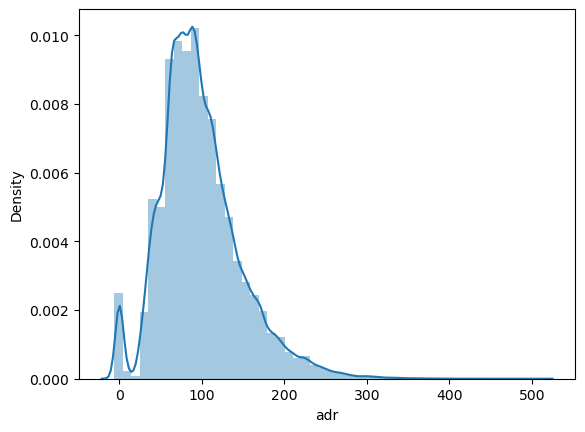

In [9]:
#UNIVARIATE AND BIVARIATE ANALYSIS
sns.distplot(filtered_data['adr'])

C:\Users\PEN BUSINESS ANALYST\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PEN BUSINESS ANALYST\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


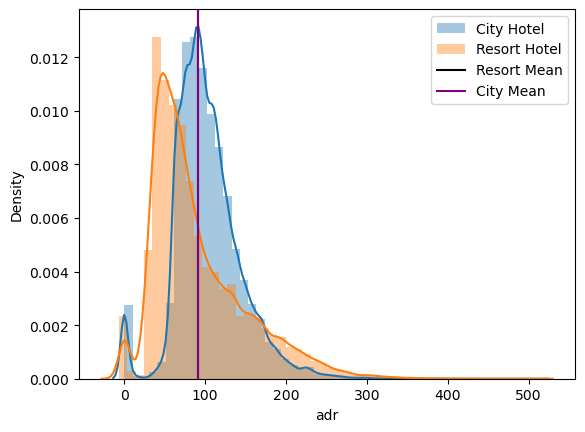

In [10]:
sns.distplot(filtered_data[filtered_data['hotel']=='City Hotel']['adr'], label = 'City Hotel')
sns.distplot(filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'], label = 'Resort Hotel')
resort_mean = filtered_data[filtered_data['hotel']=='Resort Hotel']['adr'].mean()
city_mean = filtered_data[filtered_data['hotel']=='City Hotel']['adr'].mean()
plt.axvline(resort_mean, color='black', label='Resort Mean')
plt.axvline(resort_mean, color='purple', label='City Mean')
plt.legend()
plt.savefig('ADR_Distribution.png')

C:\Users\PEN BUSINESS ANALYST\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

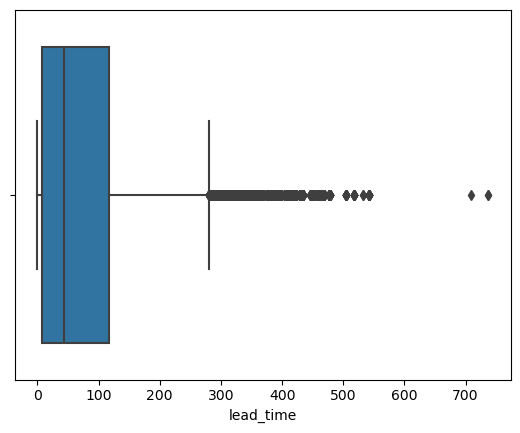

In [11]:
sns.boxplot(filtered_data['lead_time'])

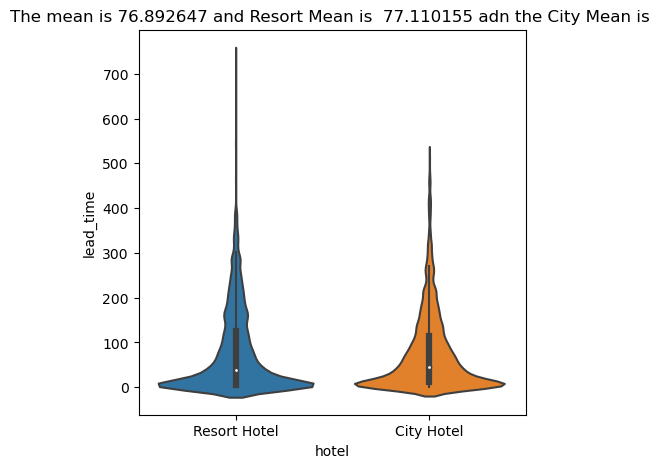

In [12]:
plt.figure(figsize=(5,5))
sns.violinplot(data = filtered_data, y = 'lead_time', x = 'hotel')
resort_mean = filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean = filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f"The mean is {filtered_data['lead_time'].mean():2f} and Resort Mean is {resort_mean: 2f} adn the City Mean is ");

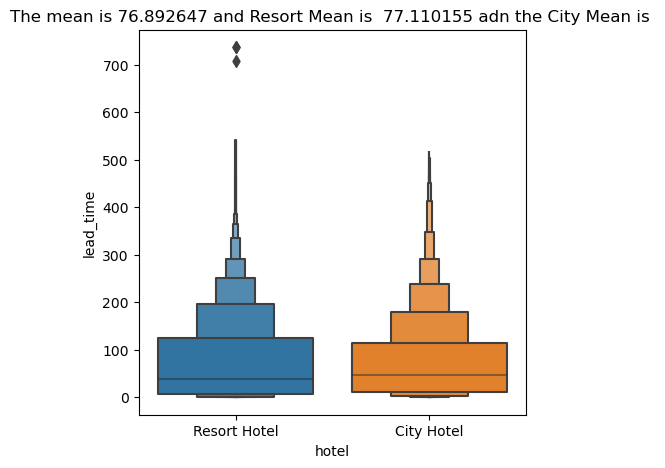

In [13]:
plt.figure(figsize=(5,5))
sns.boxenplot(data = filtered_data, y = 'lead_time', x = 'hotel')
resort_mean = filtered_data[filtered_data['hotel']=='Resort Hotel']['lead_time'].mean()
city_mean = filtered_data[filtered_data['hotel']=='City Hotel']['lead_time'].mean()
plt.title(f"The mean is {filtered_data['lead_time'].mean():2f} and Resort Mean is {resort_mean: 2f} adn the City Mean is ");

#Bivariate Analysis and Linear Regression

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

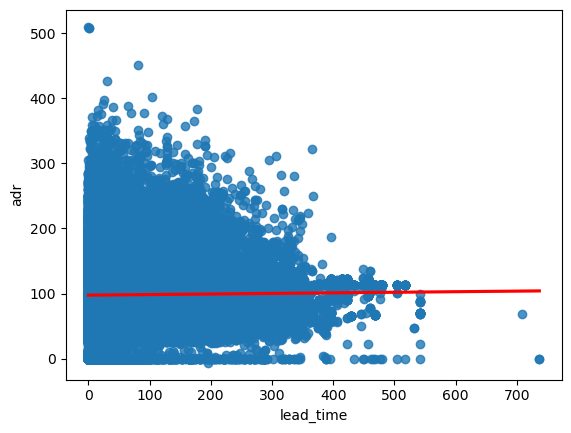

In [14]:
sns.regplot(data = filtered_data, y='adr', x= 'lead_time', line_kws={'color':'red'})

C:\Users\PEN BUSINESS ANALYST\Anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

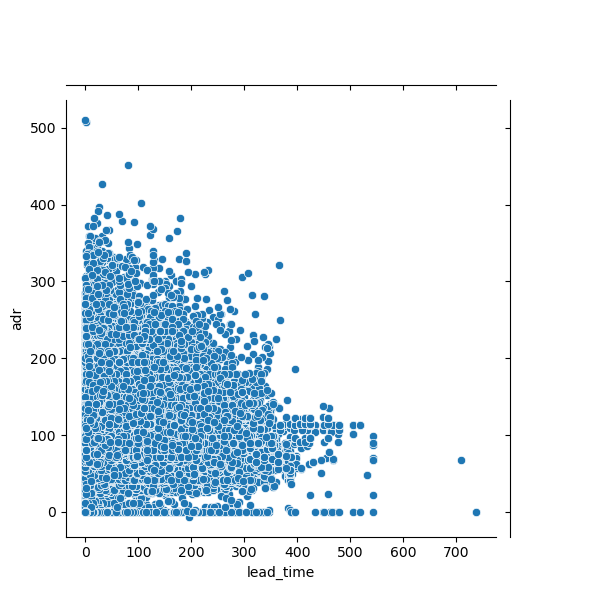

In [15]:
sns.jointplot(data = filtered_data, y='adr', x= 'lead_time', kind='reg', joint_kws={'line_kws':{'color':'red'}})

#Linear Regression

In [21]:
linregress(filtered_data['lead_time'],filtered_data['adr'])

LinregressResult(slope=0.00885584393059344, intercept=97.54811713144225, rvalue=0.016122313985460025, pvalue=1.4874734271358798e-06, stderr=0.001839893371979956, intercept_stderr=0.215970006450331)

In [22]:
linregress(filtered_data['lead_time'],filtered_data['adr'])[0]

0.00885584393059344

In [25]:
slope = linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept = linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
r2 = linregress(filtered_data['lead_time'],filtered_data['adr'])[2]
regression_table = pd.DataFrame({'Name':['slope','intercept','r2'], 'Values':[slope,intercept,r2]})
regression_table

,Name,Values
0,slope,0.008856
1,intercept,97.548117
2,r2,0.016122
